In [1]:
from irispy.sji import SJICube, SJIMap
from glob import glob

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sample_sji_files = glob('/Users/schriste/Developer/repositories/sample-data/irispy/*.fits')
sample_sji_files

['/Users/schriste/Developer/repositories/sample-data/irispy/iris_l2_20170502_052551_3893010094_SJI_1330_t000.fits',
 '/Users/schriste/Developer/repositories/sample-data/irispy/iris_l2_20170502_052551_3893010094_SJI_1400_t000.fits',
 '/Users/schriste/Developer/repositories/sample-data/irispy/iris_l2_20170502_052551_3893010094_SJI_2796_t000.fits',
 '/Users/schriste/Developer/repositories/sample-data/irispy/iris_l2_20170502_052551_3893010094_SJI_2832_t000.fits']

In [5]:
sji_1330_file = sample_sji_files[0]
sji_1400_file = sample_sji_files[1]
sji_2796_file = sample_sji_files[2]
sji_2832_file = sample_sji_files[3]

## Loading Data

In [6]:
sji_1330_cube = SJICube(sji_1330_file)

In [7]:
sji_1330_cube

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


SunPy SJICube
---------
Observatory:	 IRIS
Instrument:	 SJI
Detector:	 SJI
Measurement:	 1330.0 Angstrom
Wavelength:	 1330.0 Angstrom
Obs. Start:	 2017-05-02 05:25:51
Obs. End:	 2017-05-02 05:42:50
Num. of Frames:	 16
Dimensions:	 [ 1482.   772.]
Scale:		 [ 0.16635  0.16635] arcsec / pix
masked_array(data =
 [[[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 ..., 
 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- -

Number of frames available

In [8]:
len(sji_1330_cube)

16

## Indexing and Slicing

In [9]:
sji_1330_cube[0:4]

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


SunPy SJICube
---------
Observatory:	 IRIS
Instrument:	 SJI
Detector:	 SJI
Measurement:	 1330.0 Angstrom
Wavelength:	 1330.0 Angstrom
Obs. Start:	 2017-05-02 05:25:51
Obs. End:	 2017-05-02 05:29:15
Num. of Frames:	 4
Dimensions:	 [ 1482.   772.]
Scale:		 [ 0.16635  0.16635] arcsec / pix
masked_array(data =
 [[[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]],
  

In [10]:
type(sji_1330_cube[0:4])

irispy.sji.SJICube

An individual index is just a Map

In [11]:
sji_1330_cube[0]

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


SunPy Map
---------
Observatory:	 IRIS
Instrument:	 SJI
Detector:	 SJI
Measurement:	 1330.0 Angstrom
Wavelength:	 1330.0 Angstrom
Obs Date:	 2017-05-02 05:25:51
dt:		 15.000100 s
Dimension:	 [ 1482.   772.] pix
scale:		 [ 0.16635  0.16635] arcsec / pix

array([[-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       ..., 
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.]], dtype=float32)

In [12]:
type(sji_1330_cube[0])

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


irispy.sji.SJIMap

## SJI Maps

In [13]:
sji_1330_cube = SJICube(sji_1330_file)
sji_1400_cube = SJICube(sji_1400_file)
sji_2796_cube = SJICube(sji_2796_file)
sji_2832_cube = SJICube(sji_2832_file) 

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


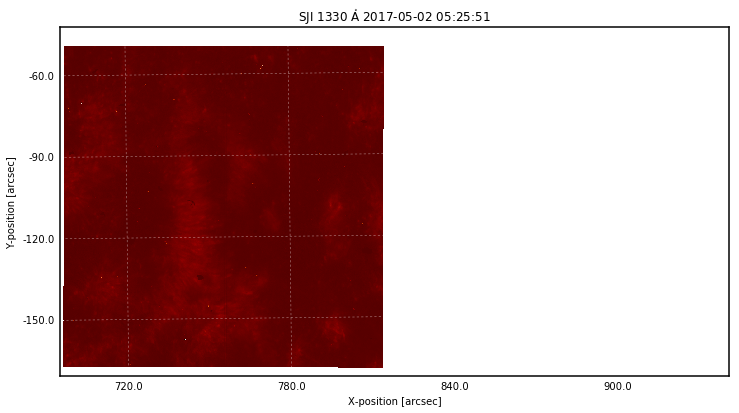

In [14]:
sji_1330_cube[0].plot()

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


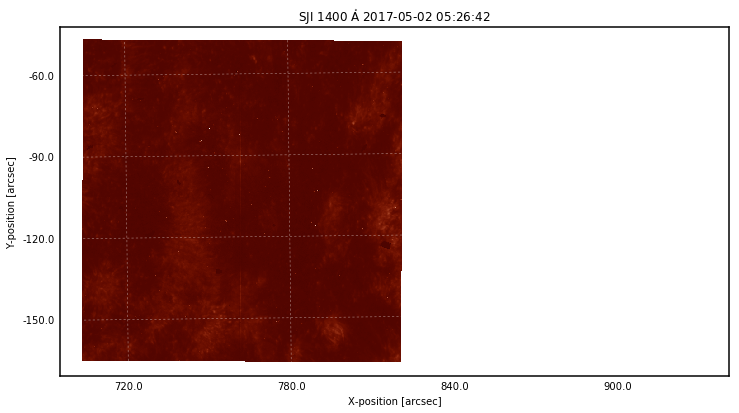

In [15]:
sji_1400_cube[0].plot()

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


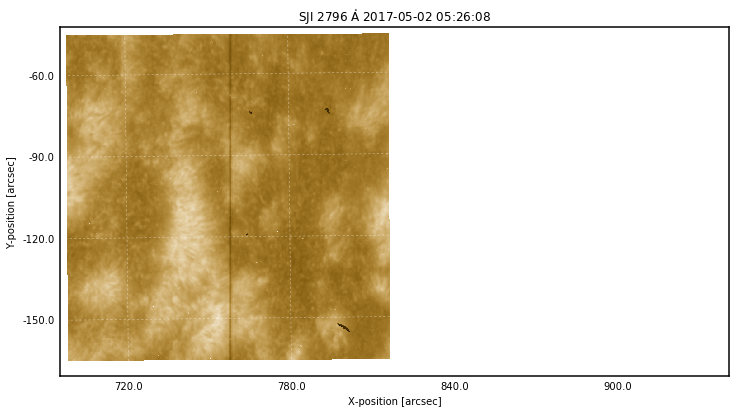

In [16]:
sji_2796_cube[0].plot()


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


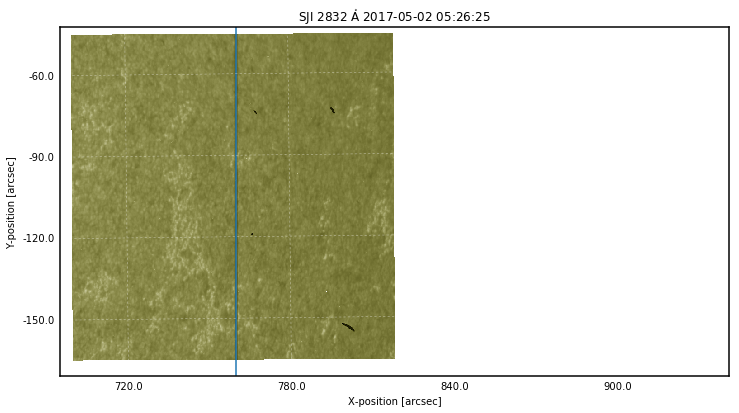

In [17]:
sji_2832_cube[0].plot()
sji_2832_cube[0].draw_slit()

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


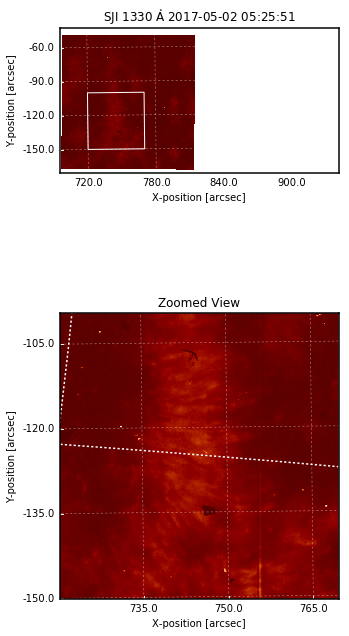

In [18]:
# Define a region of interest
length = 50 * u.arcsec
x0 = 720 * u.arcsec
y0 = -150 * u.arcsec

# Create a SunPy Map, and a second submap over the region of interest.
iris_map = sji_1330_cube[0]
submap = iris_map.submap(u.Quantity([x0, x0 + length]),
                         u.Quantity([y0, y0 + length]))

# Create a new matplotlib figure, larger than default.
fig = plt.figure(figsize=(5,12))

# Add a first Axis, using the WCS from the map.
ax1 = fig.add_subplot(2,1,1, projection=iris_map)

# Plot the Map on the axes with default settings.
iris_map.plot()

# Define a region to highlight with a box
# We have to convert the region of interest to degress, and then get the raw values.
bottom_left = u.Quantity([x0, y0])
length2 = length * 2

# Draw a box on the image
iris_map.draw_rectangle(bottom_left, length, length)

# Create a second axis on the plot.
ax2 = fig.add_subplot(2,1,2, projection=submap)

submap.plot()

# Add a overlay grid.
submap.draw_grid(grid_spacing=10*u.deg)

# Change the title.
ax2.set_title('Zoomed View')


plt.show()

## Inspecting the IRISCube Object (needs work!)

Metadata

In [19]:
sji_1330_cube.observatory

'IRIS'

In [20]:
sji_1330_cube.detector

'SJI'

In [21]:
sji_1330_cube.dimensions

(1482, 772)

In [22]:
sji_1330_cube.measurement

<Quantity 1330.0 Angstrom>

This is a quantity so can easily convert

In [23]:
sji_1330_cube.measurement.to('nm')

<Quantity 133.0 nm>

In [24]:
import astropy.units as u

In [25]:
sji_1330_cube.measurement.to('keV', equivalencies=u.spectral())

<Quantity 0.009322119768424212 keV>

In [26]:
sji_1330_cube.scale

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


Pair(x=<Quantity 0.16635 arcsec / pix>, y=<Quantity 0.16635 arcsec / pix>)

In [27]:
[str(this_date) for this_date in sji_1330_cube.date]

['2017-05-02 05:25:51.950000',
 '2017-05-02 05:26:59.860000',
 '2017-05-02 05:28:07.770000',
 '2017-05-02 05:29:15.700000',
 '2017-05-02 05:30:23.610000',
 '2017-05-02 05:31:31.520000',
 '2017-05-02 05:32:39.420000',
 '2017-05-02 05:33:47.360000',
 '2017-05-02 05:34:55.270000',
 '2017-05-02 05:36:03.170000',
 '2017-05-02 05:37:11.080000',
 '2017-05-02 05:38:19.020000',
 '2017-05-02 05:39:26.920000',
 '2017-05-02 05:40:34.830000',
 '2017-05-02 05:41:42.740000',
 '2017-05-02 05:42:50.670000']

In [28]:
sji_1330_cube.slit_position_x

<Quantity [  365.        ,  412.98175779,  460.96351558,  508.94520458,
             556.92693944,  604.90866283,  652.89039195,  700.87213255,
             748.85386167,  796.8355908 ,  844.81732566,  892.79906051,
             940.78077244,  988.76253023, 1036.74426509, 1084.72597702] arcsec>

In [29]:
sji_1330_cube.slit_position_y

<Quantity [ 352., 352., 352., 352., 352., 352., 352., 352., 352., 352.,
            352., 352., 352., 352., 352., 352.] arcsec>

In [30]:
sji_1330_cube[0].spatial_units

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


Pair(x=Unit("arcsec"), y=Unit("arcsec"))

In [31]:
sji_1330_cube.exposure_time

<Quantity [ 15.0001, 15.0001, 15.0001, 15.0001, 15.0001, 15.0001, 15.0001,
            15.0001, 15.0001, 15.0001, 15.0001, 15.0001, 15.0001, 15.0001,
            15.0001, 15.0001] s>

In [32]:
#sji_1330_cube.meta('exptime')

## Functions provided by SJICube (needs work)

can apply functions on the time dimension of the cube such as min, max, mean, std. This will return a single map.

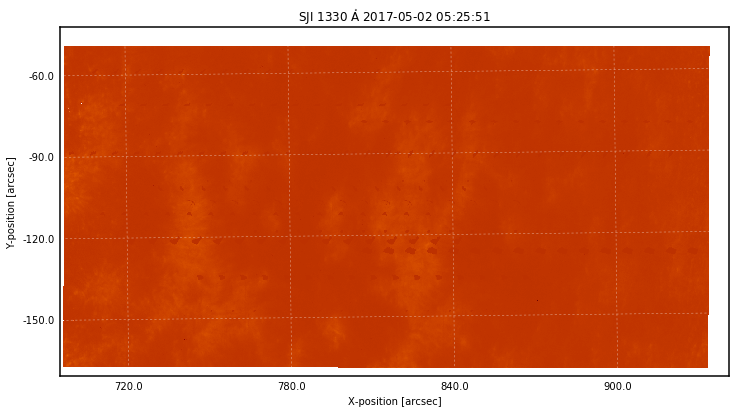

In [33]:
sji_1330_cube.min().plot()

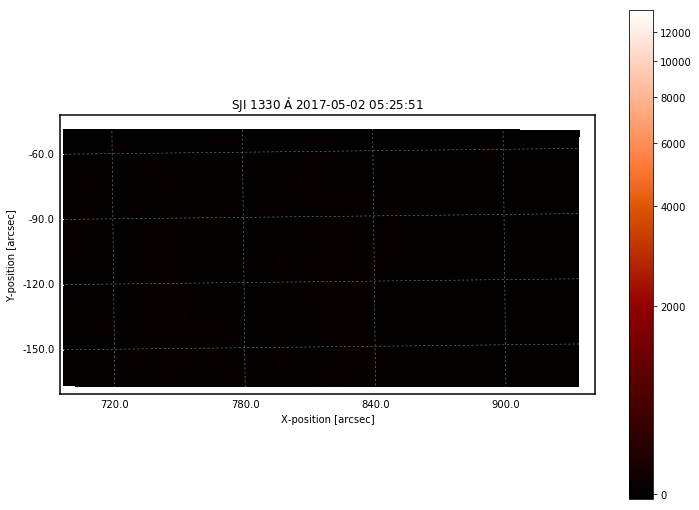

In [34]:
sji_1330_cube.max().plot()
plt.colorbar()

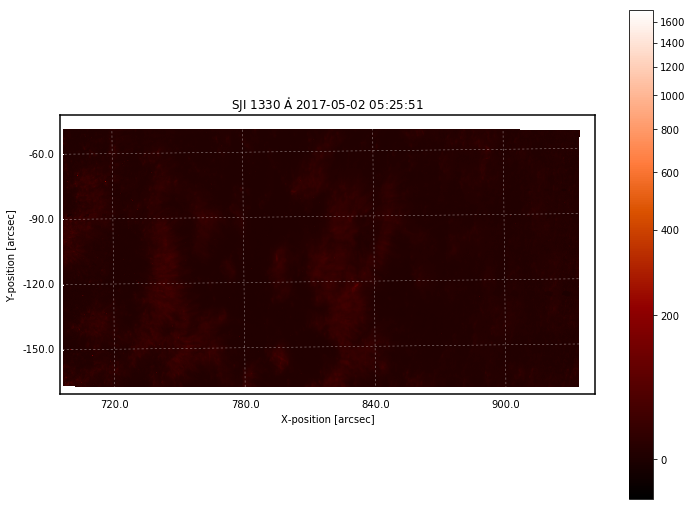

In [35]:
sji_1330_cube.mean().plot()
plt.colorbar()

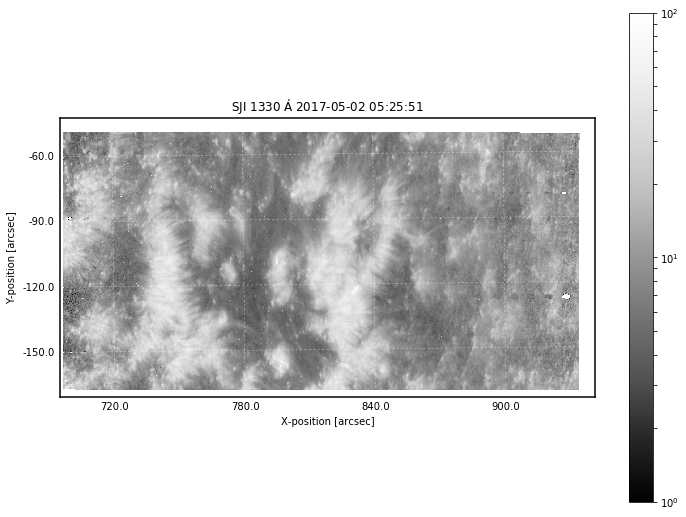

In [36]:
import matplotlib.cm as cm
import matplotlib.colors as colors
mean_map = sji_1330_cube.mean()
mean_map.plot_settings['cmap'] = cm.get_cmap('Greys_r')
mean_map.plot_settings['norm'] = colors.LogNorm(1, 100)
mean_map.plot()
plt.colorbar()

In [37]:
sji_cube.lightcurve(40,100).data

NameError: name 'sji_cube' is not defined

In [38]:
def plot(x):
    sji_cube[x].plot()
interact(plot, x=(0,10))

NameError: name 'interact' is not defined

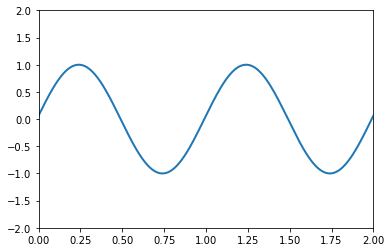

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())


NameError: name 'sji_cube' is not defined

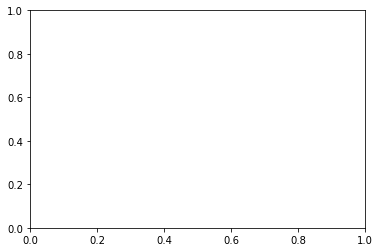

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax = sji_cube[0].plot()

# animation function. This is called sequentially
def animate(*args):
    ax.set_array(sji_cube[args[0]].data)
    return  ax
    
def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,



# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, interval=50, blit=True)
HTML(anim.to_html5_video())



In [42]:
ax.set_a

AttributeError: 'AxesSubplot' object has no attribute 'set_a'

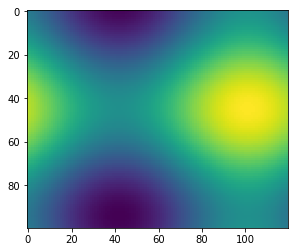

In [43]:
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)

def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True);
HTML(ani.to_html5_video())

In [ ]:
im